# Demo of the PACS data loader

In [ ]:
import matplotlib.pyplot as plt
from torchvision import transforms as T
from pacs import get_data_loaders, get_normalization_stats

Matplotlib is building the font cache; this may take a moment.


In [2]:
readable_labels = ["dog", "elephant", "giraffe", "guitar", "horse", "house", "person"]
domains = ["art_painting", "cartoon", "photo", "sketch"]

In [ ]:
for d in domains:
    mean, std = get_normalization_stats(d)
    print(f"Normalization statistics excluding domain {d}:\n\tmean: {mean}\n\tstd:  {std}")

Normalization statistics excluding domain art_painting:
	mean: tensor([0.8185, 0.8058, 0.7828])
	std:  tensor([0.1691, 0.1735, 0.1904])
Normalization statistics excluding domain cartoon:
	mean: tensor([0.7512, 0.7332, 0.7101])
	std:  tensor([0.1835, 0.1886, 0.2020])
Normalization statistics excluding domain photo:
	mean: tensor([0.8158, 0.7974, 0.7717])
	std:  tensor([0.1672, 0.1741, 0.1914])
Normalization statistics excluding domain sketch:
	mean: tensor([0.6399, 0.6076, 0.5603])
	std:  tensor([0.1787, 0.1796, 0.1951])


In [4]:
train_loader, test_loader = get_data_loaders(target_domain="cartoon", train_batch_size=16, transform=T.ToTensor())

Feature batch shape: torch.Size([16, 3, 227, 227])
Labels batch shape: torch.Size([16])


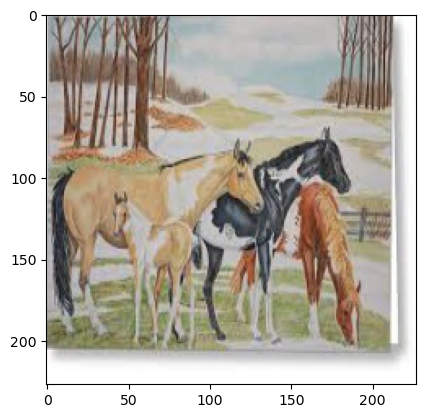

Label: 4 horse


In [ ]:
train_features, _train_domains, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label} {readable_labels[label]}")